## Logistic regression with tensorflow

The 8th KIAS CAC Summer School 

Machine Learning Practice I - Logistic Regression example

Author: Yung-Kyun Noh, Ph.D.

Many parts are borrowed from Jiseob Kim's <a href="https://github.com/kias-tf-tutorial/kias-tf-tutorial">Github</a>.


In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data preparation

We use a two-class synthetic dataset from two different Gaussian density functions.
\begin{eqnarray}
p(\mathbf{x}|\mu_c, \Sigma_c) = \frac{1}{\sqrt{2\pi}|\Sigma_c|^\frac{1}{2}} \exp\left(-\frac{1}{2}(\mathbf{x} - \mu_c)^\top\Sigma_c^{-1}(\mathbf{x} - \mu_c)\right)   \quad \text{for class} \quad c = \{1,2\}
\end{eqnarray}

The first class uses $\mu_1 = \left(\begin{array}{c}
4 \\
0
\end{array}\right)$, $\Sigma_1 = \left(\begin{array}{cc}
1 & 0 \\
0 & 1
\end{array}\right)$, and the second class uses $\mu_2 = \left(\begin{array}{c}
0 \\
4
\end{array}\right)$, $\Sigma_2 = \left(\begin{array}{cc}
1 & 0 \\
0 & 1
\end{array}\right)$.

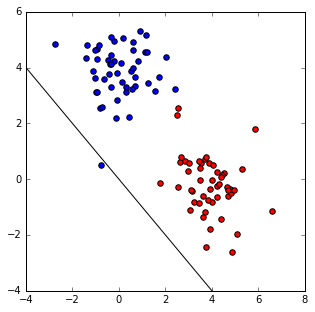

In [3]:
n_data_per_class = 50
num_class = 2
dim_data = 2
data1 = np.random.multivariate_normal([4,0], [[1,0],[0,1]], n_data_per_class)
#print data1
data2 = np.random.multivariate_normal([0,4], [[1,0],[0,1]], n_data_per_class)
data_x = np.vstack([data1,data2])
data_y = np.hstack([np.ones((n_data_per_class,)), -np.ones((n_data_per_class,))])

def draw_state(wval, bval):
    plt.rcParams['figure.figsize']=(5,5)
    plt.scatter(data1[:,0],data1[:,1],30,'r')
    plt.scatter(data2[:,0],data2[:,1],30,'b')
    [x1min,x1max,x2min,x2max] = plt.axis()
    x1val = np.arange(x1min,x1max,0.1)
    
    plt.plot(x1val, -(wval[0]*x1val+bval)/wval[1], 'k')
    plt.axis([x1min,x1max,x2min,x2max])
    plt.show()
    

W_temp = [1,1]
b_temp = 0
draw_state(W_temp, b_temp)

## Logistic regression


\begin{eqnarray}
P(y = 1|\mathbf{x};\mathbf{w},b) &=& \frac{1}{1 + \exp(-(\mathbf{w}^\top\mathbf{x} + b))} \\
P(y = -1|\mathbf{x};\mathbf{w},b) &=& \frac{1}{1 + \exp(\mathbf{w}^\top\mathbf{x} + b)}
\end{eqnarray}
The objective function $L$ with $\mathcal{D}=\{\mathbf{x}_i,y_i\}_{i = 1}^N$
\begin{eqnarray}
L &=& -\log P(y_1,\ldots,y_N|\mathbf{x}_1,\ldots,\mathbf{x}_N; \mathbf{w}, b) + \lambda ||\mathbf{w}||^2 \quad 
\left( P(y_1,\ldots,y_N|\mathbf{x}_1,\ldots,\mathbf{x}_N; \mathbf{w}, b) = \prod_{i = 1}^N P(y = y_i|\mathbf{x} = \mathbf{x}_i; \mathbf{w}, b) \right) \\
&=&-\sum_i \log p(y_i|\mathbf{x}_i; \mathbf{w}, b) + \lambda ||\mathbf{w}||^2
\end{eqnarray}


In [4]:
# Create the model

x = tf.placeholder(tf.float32, [None, dim_data])
#W = tf.Variable(tf.zeros([dim_data,1]))
W = tf.Variable(tf.ones([dim_data,1]))
b = tf.Variable(tf.zeros([1]))
y_true = tf.placeholder(tf.float32, [None])

In [5]:
a = tf.matmul(x, W) + b
p_y = tf.sigmoid(tf.mul(a, tf.reshape(y_true, [-1,1]) ))
print p_y

Tensor("Sigmoid:0", shape=(?, 1), dtype=float32)


In [6]:
loss = tf.reduce_mean(-tf.log(p_y))

In [7]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [8]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
sess.run(tf.initialize_all_variables())


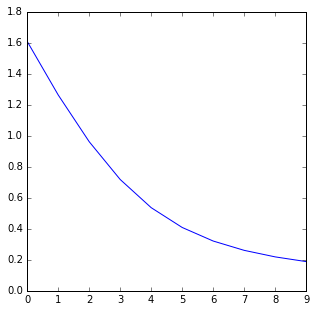

In [9]:
# Train
loss_history = []
for i in range(10):
    sess.run(train_step, feed_dict={x: data_x, y_true: data_y})
    loss_history.append( sess.run(loss, feed_dict={x: data_x, y_true: data_y}) )
    #print sess.run( p_y, feed_dict={x: data_x, y_true: data_y})
    #print sess.run(W), sess.run(b)
    
plt.plot(loss_history)

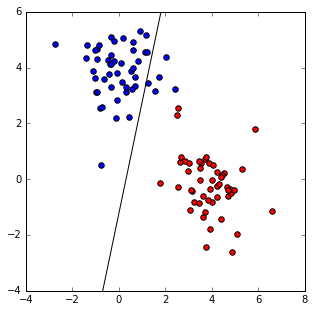

In [10]:
draw_state(sess.run(W), sess.run(b))
